## Week 6
## The two-dimensional Laplace equation
$$\frac{\partial ^2 P}{\partial x^2} + \frac{\partial ^2 P}{\partial y^2} = 0$$
### Discretization
$$\frac{P_{i+1, j}^n - 2P_{i,j}^n + P_{i-1,j}^n}{\Delta x^2} + \frac{P_{i,j+1}^n - 2P_{i,j}^n + P_{i, j-1}^n}{\Delta y^2} = 0$$
### Boundary conditions
$$P(x=0, 0<y<0.7) = 0$$
$$P(x=0, 0.7<y<1) = 1$$
$$P(x=1, 0<y<0.3) = 1$$
$$P(x=1, 0.3<y<1) = 0$$
$$P(x, y=0) = 0$$
$$P(x, y=1) = 0$$

### 1. Jacobi method

#### Discretization
$$\frac{P_{i+1, j}^n - 2P_{i,j}^{n+1} + P_{i-1,j}^n}{\Delta x^2} + \frac{P_{i,j+1}^n - 2P_{i,j}^{n+1} + P_{i, j-1}^n}{\Delta y^2} = 0$$
#### Final iterative form
$$P_{i,j}^{n+1} = \frac{\Delta y^2(P_{i+1,j}^n + P_{i-1,j}^n)+\Delta x^2(P_{i,j+1}^n + P_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

### 2. Gauss-Seidel method
#### Discretization
$$\frac{P_{i+1, j}^n - 2P_{i,j}^{n+1} + P_{i-1,j}^{n+1}}{\Delta x^2} + \frac{P_{i,j+1}^n - 2P_{i,j}^{n+1} + P_{i, j-1}^{n+1}}{\Delta y^2} = 0$$
#### Final iterative form
$$P_{i,j}^{n+1} = \frac{\Delta y^2(P_{i+1,j}^n + P_{i-1,j}^{n+1})+\Delta x^2(P_{i,j+1}^n + P_{i,j-1}^{n+1})}{2(\Delta x^2 + \Delta y^2)}$$

### 3. Over relaxation method
#### Discretization
$$\frac{P_{i+1, j}^n - 2P_{i,j}^{n+1} + P_{i-1,j}^{n+1}}{\Delta x^2} + \frac{P_{i,j+1}^n - 2P_{i,j}^{n+1} + P_{i, j-1}^{n+1}}{\Delta y^2} = 0$$
We are gonna use this substitution $$P_{i,j}^{n+1} = \frac{P_{i,j}^{n+1}}{w} + (1 - \frac{1}{w})P_{i,j}^n$$
#### Final iterative form
$$P_{i,j}^{n+1} = w\frac{\Delta y^2(P_{i+1,j}^n + P_{i-1,j}^{n+1})+\Delta x^2(P_{i,j+1}^n + P_{i,j-1}^{n+1})}{2(\Delta x^2 + \Delta y^2)} + (1 - w)P_{i,j}^n$$
Here $w$ is relaxation parameter, $w \in (1,2)$

In [5]:
import numpy as np
from numpy import (pi, exp, sin, cos)
import matplotlib.pyplot as plt
from time import perf_counter

In [6]:
dx = 0.01
dy = 0.01

start_x, end_x = (0, 1)
start_y, end_y = (0, 1)

N = int((end_x - start_x) / dx) + 1
M = int((end_y - start_y) / dy) + 1

x = start_x + np.arange(start=0, stop=N) * dx
y = start_y + np.arange(start=0, stop=M) * dy
X, Y = np.meshgrid(x, y)

P_old = np.zeros((M, N))
P_new = np.zeros((M, N))

In [7]:
# Boundary conditions
# P(x=0, 0<y<0.7) = 0
# P(x=0, 0.7<y<1) = 1
# P(x=1, 0<y<0.3) = 1
# P(x=1, 0.3<y<1) = 0
# P(x, y=0) = 0
# P(x, y=1) = 0
def set_boundary_P(P:np.ndarray):
    P[0:M2, 0] = 0
    P[M2:M, 0] = 1
    P[0:M1, N-1] = 1
    P[M1:M, N-1] = 0
    P[0, 0:N] = 0
    P[M-1, 0:N] = 0

M1 = int(0.3 * M)
M2 = int(0.7 * M)

In [8]:
def plot_result(X, Y, P, name="Numerical method"):
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.contourf(X, Y, P)
    plt.colorbar()
    plt.tight_layout()

Now let's write decorator that measures execution time of functions

In [10]:
from functools import wraps

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = perf_counter()
        result = func(*args, **kwargs)
        end_time = perf_counter()
        print(f"{func.__doc__}")
        print(f"Calculation time: {(end_time - start_time):.3f} seconds")
        return result
    
    return timeit_wrapper

In [11]:
@timeit
def Jacobi_method(P:np.ndarray, N, M, dx, dy,
                    eps=1e-6, stop_iteration=3e4) -> np.ndarray:
    """Jacobi method for solving 2D Laplace equation"""
    P_old = P.copy()
    P_new = np.zeros_like(P)

    set_boundary_P(P=P_old)

    iteration = 0
    maximum = 1
    while maximum > eps and iteration < stop_iteration:
        P_new[1:M-1, 1:N-1] = (
            dy**2*(P_old[1:M-1, 2:N] + P_old[1:M-1, 0:N-2]) 
            + dx**2*(P_old[2:M, 1:N-1] + P_old[0:M-2, 1:N-1])
            ) / (2*(dx**2 + dy**2))
        
        set_boundary_P(P=P_new)
        
        maximum = np.max(np.abs(P_new - P_old))
        P_old = P_new.copy()
        iteration += 1

    print(f"Number of iterations: {iteration}")
    print(f"Maximum absolute difference: {maximum}")
    
    return P_new

In [12]:
P_1 = Jacobi_method(P_old, N, M, dx, dy)

Number of iterations: 8940
Maximum absolute difference: 9.996674346646195e-07
Jacobi method for solving 2D Laplace equation
Calculation time: 0.933 seconds


Wow, it is actually fast, good. Now let's visualize the solution

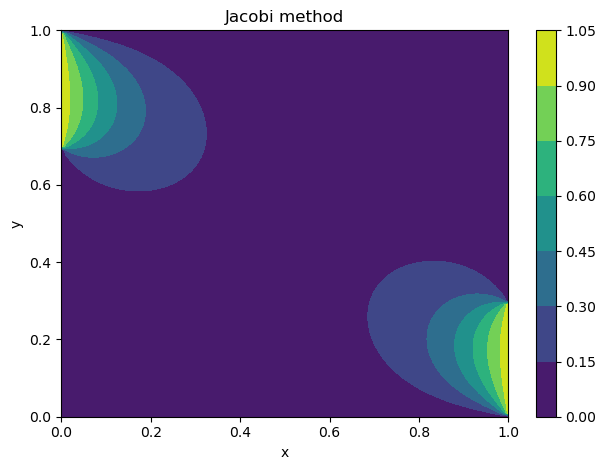

In [14]:
plot_result(X, Y, P_1, name="Jacobi method")

In [15]:
@timeit
def Gauss_Seidel_method(P0:np.ndarray, P1:np.ndarray, N, M, 
                        dx, dy, eps=1e-6, stop_iteration=3e4):
    """Gauss-Seidel method for solving 2D Laplace equation"""
    P_old = P0.copy()
    P_new = P1.copy()

    set_boundary_P(P=P_old)
    set_boundary_P(P=P_new)
    
    iteration = 0
    maximum = 1
    while maximum > eps and iteration < stop_iteration:
        for j in range(1, M-1):
            for i in range(1, N-1):
                P_new[j, i] = (
                    dy**2*(P_old[j, i+1] + P_new[j, i-1]) \
                    + dx**2*(P_old[j+1, i] + P_new[j-1, i])
                    ) / (2*(dx**2 + dy**2))
                
        set_boundary_P(P=P_old)
        set_boundary_P(P=P_new)

        maximum = np.max(np.abs(P_new - P_old))
        # print(f"{iteration = }\t{maximum = }")
        P_old = P_new.copy()
        iteration += 1

    print(f"Number of iterations: {iteration}")
    print(f"Maximum absolute difference: {maximum}")
    
    return P_new

In [16]:
P_2 = Gauss_Seidel_method(P_old, P_new, N, M, dx, dy)

Number of iterations: 5173
Maximum absolute difference: 9.992158485488956e-07
Gauss-Seidel method for solving 2D Laplace equation
Calculation time: 98.094 seconds


It takes a lot of time that is not good. So let's try how we can optimize this code?

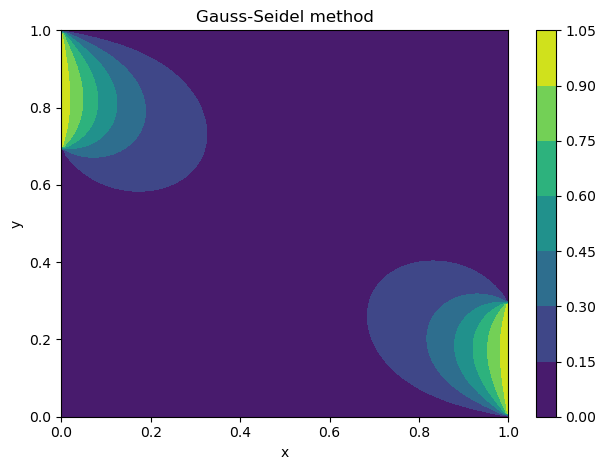

In [18]:
plot_result(X, Y, P_2, name="Gauss-Seidel method")

### Try to use Numba
To optimize python for loops we can use Numba library that is designed for this. Numba is a good choice if you want to speed up a code that requires a lot of numerical calculations like our code. When your done with code first run will a few seconds because numba trying to complile python code to machine code and then you can use directly machine code. After this cell you will see the first and second run of numba code where the second one shows actual calculation time.

* Source: https://numba.pydata.org/numba-doc/dev/user/5minguide.html

In [20]:
from numba import jit

@timeit
@jit(nopython=True)
def Numba_Gauss_Seidel_method(P0:np.ndarray, P1:np.ndarray, N, M, 
                        dx, dy, eps=1e-6, stop_iteration=3e4):
    """Boosted Gauss-Seidel method for solving 2D Laplace equation"""
    P_old = P0.copy()
    P_new = P1.copy()
    
    M1 = int(0.3 * M)
    M2 = int(0.7 * M)

    P_old[0:M2, 0] = 0
    P_old[M2:M, 0] = 1
    P_old[0:M1, N-1] = 1
    P_old[M1:M, N-1] = 0
    P_old[0, 0:N] = 0
    P_old[M-1, 0:N] = 0

    P_new[0:M2, 0] = 0
    P_new[M2:M, 0] = 1
    P_new[0:M1, N-1] = 1
    P_new[M1:M, N-1] = 0
    P_new[0, 0:N] = 0
    P_new[M-1, 0:N] = 0

    iteration = 0
    maximum = 1
    while maximum > eps and iteration < stop_iteration:
        for j in range(1, M-1):
            for i in range(1, N-1):
                P_new[j, i] = (
                    dy**2*(P_old[j, i+1] + P_new[j, i-1]) \
                    + dx**2*(P_old[j+1, i] + P_new[j-1, i])
                    ) / (2*(dx**2 + dy**2))
                
        P_old[0:M2, 0] = 0
        P_old[M2:M, 0] = 1
        P_old[0:M1, N-1] = 1
        P_old[M1:M, N-1] = 0
        P_old[0, 0:N] = 0
        P_old[M-1, 0:N] = 0

        P_new[0:M2, 0] = 0
        P_new[M2:M, 0] = 1
        P_new[0:M1, N-1] = 1
        P_new[M1:M, N-1] = 0
        P_new[0, 0:N] = 0
        P_new[M-1, 0:N] = 0

        maximum = np.max(np.abs(P_new - P_old))
        # print("Iteration", iteration, "\t", "maximum", maximum)
        P_old = P_new.copy()
        iteration += 1

    print("Number of iterations:", iteration)
    print("Maximum absolute difference:", maximum)
    
    return P_new

In [21]:
P_2N = Numba_Gauss_Seidel_method(P_old, P_new, N, M, dx, dy)

Number of iterations: 5173
Maximum absolute difference: 9.992158485488956e-07
Boosted Gauss-Seidel method for solving 2D Laplace equation
Calculation time: 3.830 seconds


In [22]:
P_2N = Numba_Gauss_Seidel_method(P_old, P_new, N, M, dx, dy)

Number of iterations: 5173
Maximum absolute difference: 9.992158485488956e-07
Boosted Gauss-Seidel method for solving 2D Laplace equation
Calculation time: 0.437 seconds


#### As you can see the first run takes some time because it tries complile first and then run it. In the second run it uses already compiled code and it is much faster than original python where it was taken 90 seconds.

## Almost 200 times faster!

Good, it calculates very quickly and the results the same with the original python code

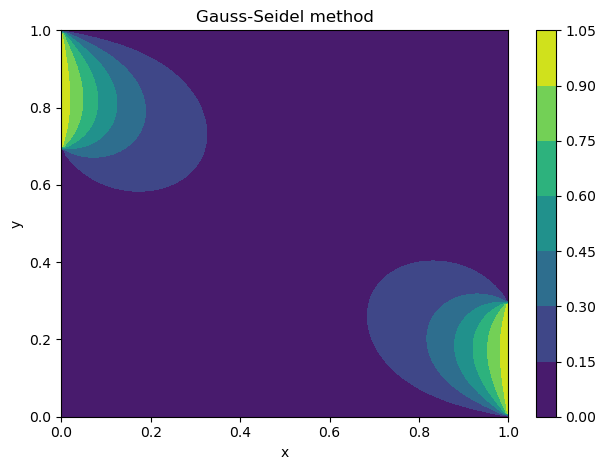

In [24]:
plot_result(X, Y, P_2N, name="Gauss-Seidel method")

In [25]:
@timeit
def Over_Relaxation_method(P0:np.ndarray, P1:np.ndarray, N, M, 
                        dx, dy, w=1.9, eps=1e-6, stop_iteration=3e4):
    """Over relaxation method for solving 2D Laplace equation"""
    P_old = P0.copy()
    P_new = P1.copy()
    
    iteration = 0
    maximum = 1
    while maximum > eps and iteration < stop_iteration:
        set_boundary_P(P=P_old)
        set_boundary_P(P=P_new)

        for j in range(1, M-1):
            for i in range(1, N-1):
                P_new[j, i] = w*(
                    dy**2*(P_old[j, i+1] + P_new[j, i-1]) \
                    + dx**2*(P_old[j+1, i] + P_new[j-1, i])
                    ) / (2*(dx**2 + dy**2)) \
                    + (1 - w)*P_old[j][i]
                
        maximum = np.max(np.abs(P_new - P_old))
        # print("Iteration", iteration, "\t", "maximum", maximum)
        P_old = P_new.copy()
        iteration += 1

    print(f"Number of iterations: {iteration}")
    print(f"Maximum absolute difference: {maximum}")
    
    return P_new

In [26]:
P_3 = Over_Relaxation_method(P_old, P_new, N, M, dx, dy, w=1.94)

Number of iterations: 224
Maximum absolute difference: 9.607528082405947e-07
Over relaxation method for solving 2D Laplace equation
Calculation time: 6.452 seconds


Here in the over relaxation code works relatively slowly, so we need to speed up using Numba. Let's do this!

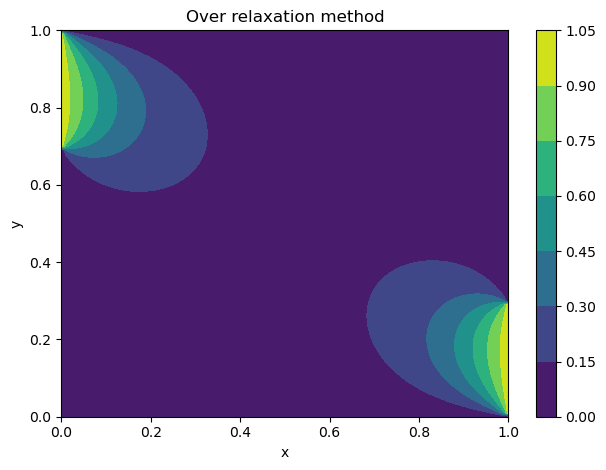

In [28]:
plot_result(X, Y, P_3, name="Over relaxation method")

In [29]:
@timeit
@jit(nopython=True)
def Numba_Over_Relaxation_method(P0:np.ndarray, P1:np.ndarray, N, M, dx, dy, 
                                    w=1.9, eps=1e-6, stop_iteration=3e4):
    """Boosted Over relaxation method for solving 2D Laplace equation"""
    P_old = P0.copy()
    P_new = P1.copy()
    
    M1 = int(0.3 * M)
    M2 = int(0.7 * M)

    iteration = 0
    maximum = 1
    while maximum > eps and iteration < stop_iteration:
        P_old[0:M2, 0] = 0
        P_old[M2:M, 0] = 1
        P_old[0:M1, N-1] = 1
        P_old[M1:M, N-1] = 0
        P_old[0, 0:N] = 0
        P_old[M-1, 0:N] = 0

        P_new[0:M2, 0] = 0
        P_new[M2:M, 0] = 1
        P_new[0:M1, N-1] = 1
        P_new[M1:M, N-1] = 0
        P_new[0, 0:N] = 0
        P_new[M-1, 0:N] = 0

        for j in range(1, M-1):
            for i in range(1, N-1):
                P_new[j, i] = w*(
                    dy**2*(P_old[j, i+1] + P_new[j, i-1]) \
                    + dx**2*(P_old[j+1, i] + P_new[j-1, i])
                    ) / (2*(dx**2 + dy**2)) \
                    + (1 - w)*P_old[j][i]
                
        maximum = np.max(np.abs(P_new - P_old))
        # print("Iteration", iteration, "\t", "maximum", maximum)
        P_old = P_new.copy()
        iteration += 1

    print("Number of iterations:", iteration)
    print("Maximum absolute difference:", maximum)
    
    return P_new

In [30]:
P_3N = Numba_Over_Relaxation_method(P_old, P_new, N, M, dx, dy, w=1.94)

Number of iterations: 224
Maximum absolute difference: 9.607528082405947e-07
Boosted Over relaxation method for solving 2D Laplace equation
Calculation time: 0.979 seconds


In [31]:
P_3N = Numba_Over_Relaxation_method(P_old, P_new, N, M, dx, dy, w=1.94)

Number of iterations: 224
Maximum absolute difference: 9.607528082405947e-07
Boosted Over relaxation method for solving 2D Laplace equation
Calculation time: 0.024 seconds


Woow! It calculates in 0.024 seconds that it very very fast!

### Almost 250 times faster!

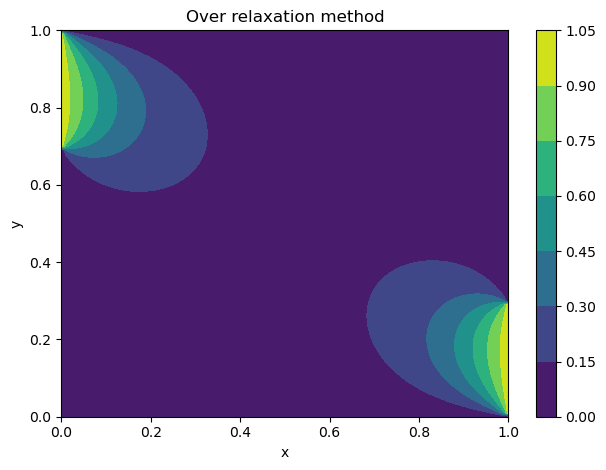

In [33]:
plot_result(X, Y, P_3N, name="Over relaxation method")

We've done a good job. Let's now save our results

In [35]:
import os

path = "Results"
if not os.path.exists(path):
    os.makedirs(path)

In [36]:
np.savetxt(f"{path}\\HW6_X_py.txt", X, fmt="%.6f", delimiter="\t")
np.savetxt(f"{path}\\HW6_Y_py.txt", Y, fmt="%.6f", delimiter="\t")
np.savetxt(f"{path}\\HW6_P1_py.txt", P_1, fmt="%.6f", delimiter="\t")
np.savetxt(f"{path}\\HW6_P2_py.txt", P_2N, fmt="%.6f", delimiter="\t")
np.savetxt(f"{path}\\HW6_P3_py.txt", P_3N, fmt="%.6f", delimiter="\t")

print("The results recorded")

The results recorded


#### During this week, we went through and applied three methods for Laplace's equation, and also speed up code using the numba library. I hope you found this interesting and useful. See you next week!